### This is a regression Project where I will be predicting the price of laptop depending upon different factors like:-
1. Brand
2. Type of Latpto(Ultrabook, Gaming etc)
3. RAM
4. Weight of the lapton
5. Operating Systme
6. GPU
7. TouchScreen
8. IPS Display
9. Hard Drive
10. SSD
11. Screen Resolution
12. Screen Size
13. Processor

### After considering all the features mentioned my model will succesfully predict the price of any laptop available in the market with optimum accuracy as per the datasets I have used for training
<hr>
<hr>

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Understanding the data

In [4]:
df.shape # The dataset is relatievely small so the predcitions may be a little off but will try to genearte a good model

(1303, 12)

In [5]:
df.describe(include="all") # Basics Stats summary of my data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1303.00000,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,727,NaN,507,190,619,412,281,1072,121,NaN
mean,651.00000,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59870.042910
std,376.28801,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37243.201786
min,0.00000,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,325.50000,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31914.720000
50%,651.00000,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52054.560000
75%,976.50000,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79274.246400


In [6]:
df.info() # general info of my whole data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.duplicated().sum() # No Dulplicate values

0

In [8]:
df.isnull().sum() # Checking for null values

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.nunique() # total uniques values in each columns

Unnamed: 0          1303
Company               19
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price                791
dtype: int64

In [10]:
df.corr()

,Unnamed: 0,Inches,Price
Unnamed: 0,1.000000,-0.087936,0.067984
Inches,-0.087936,1.000000,0.068197
Price,0.067984,0.068197,1.000000


# Data Preprocessing

In [11]:
# Dropping unnecessary column
df = df.drop("Unnamed: 0", axis = 1) 

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


<hr>
<hr>

In [13]:
# THe prices are in INR so changed it to NPR
df["Price"]

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

In [14]:
df["Price"] = df["Price"]*1.6
df["Price"]

0       114205.89312
1        76632.83712
2        49017.60000
3       216312.53760
4       153753.29280
            ...     
1298     54388.22400
1299    127786.75200
1300     19521.79200
1301     65129.47200
1302     31456.51200
Name: Price, Length: 1303, dtype: float64

<hr>
<hr>

In [15]:
# I dont need GB in Ram column and kg in Weight column
df["Ram"] = df["Ram"].str.replace("GB", "")
df["Weight"] = df["Weight"].str.replace("kg", "")

In [16]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114205.89312
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76632.83712
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,49017.60000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216312.53760
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153753.29280


<hr>
<hr>

In [17]:
# Note that the ram and weights are still objects not int even though we removed the strings so to change it
df["Ram"] = df["Ram"].astype(int)
df["Weight"] = df["Weight"].astype(float)
df["Price"] = df["Price"].astype(int) # I dont wnat decimal values so making this integer tooo

In [18]:
df.info() # Ram and weight is convered which can be seen below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
dtypes: float64(2), int32(2), object(7)
memory usage: 101.9+ KB


<hr>
<hr>

# Exploratory Data Analysis(EDA)

# Univariate Analysis

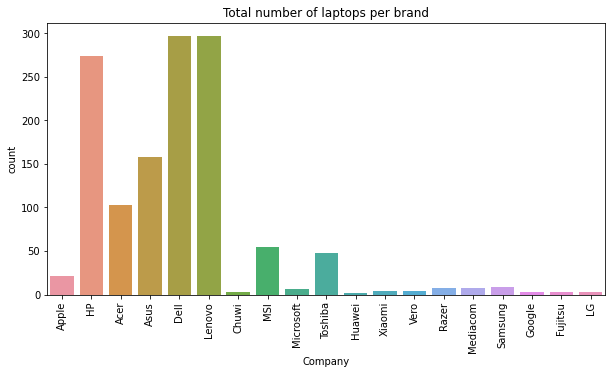

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df["Company"])
plt.xticks(rotation="90")
plt.title("Total number of laptops per brand")
plt.show()

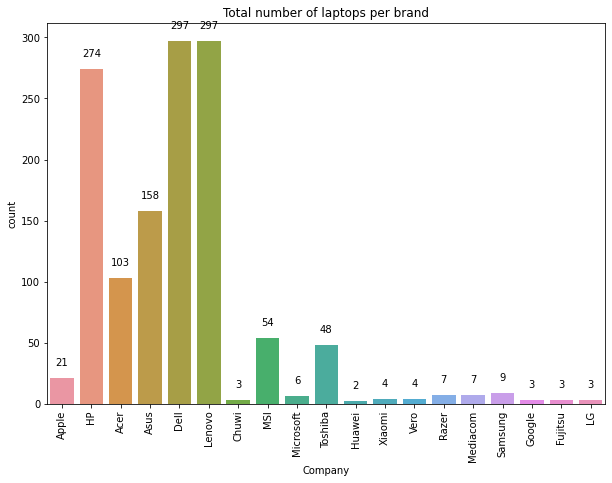

In [20]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df["Company"])
plt.xticks(rotation="90")
plt.title("Total number of laptops per brand")

# add count value on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10, height, ha="center")

plt.show()

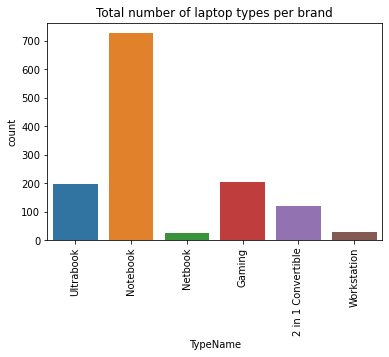

In [21]:
sns.countplot(df["TypeName"])
plt.xticks(rotation="90")
plt.title("Total number of laptop types per brand")
plt.show()

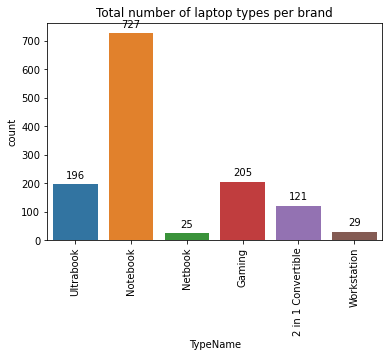

In [22]:
ax = sns.countplot(df["TypeName"])
plt.xticks(rotation="90")
plt.title("Total number of laptop types per brand")

# add count value on the top of each column
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

<AxesSubplot:ylabel='TypeName'>

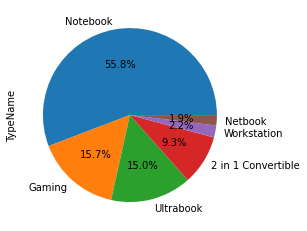

In [23]:
df["TypeName"].value_counts().plot(kind="pie", autopct='%1.1f%%')

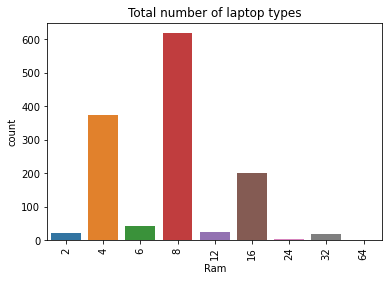

In [24]:
sns.countplot(df["Ram"])
plt.xticks(rotation="90")
plt.title("Total number of laptop types")
plt.show()
# Laptop with 8gb ram are more in comparision to others

<AxesSubplot:xlabel='Price'>

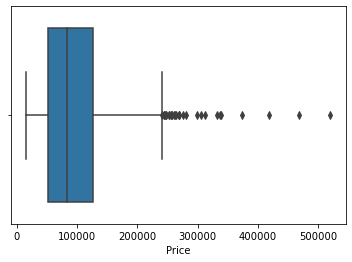

In [25]:
sns.boxplot(df["Price"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

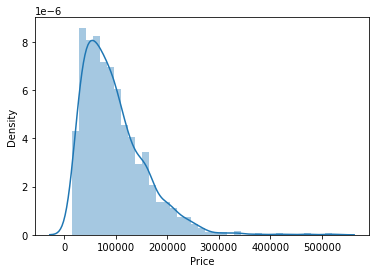

In [26]:
sns.distplot(df["Price"]) # Distribution of prices

<hr>
<hr>

# Biivariate Analysis

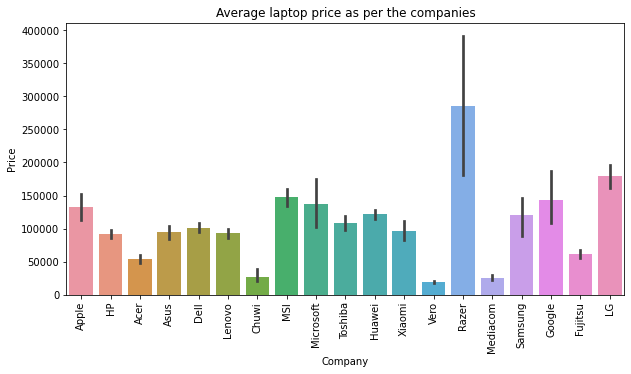

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(df["Company"], df["Price"])
plt.xticks(rotation=90)
plt.title("Average laptop price as per the companies")
plt.show()
# From below fig it can be said that razor lapops are the most expensive ones

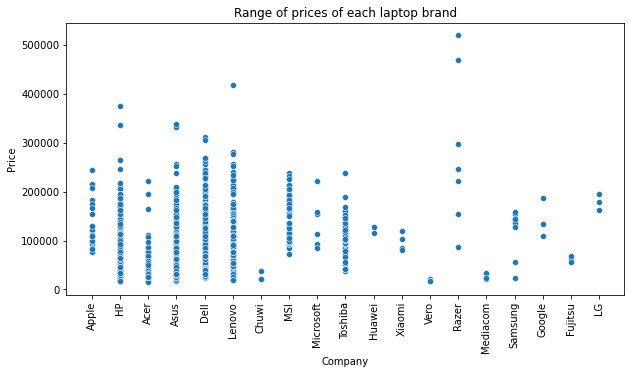

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Company"], df["Price"])
plt.xticks(rotation=90)
plt.title("Range of prices of each laptop brand") 
plt.show()

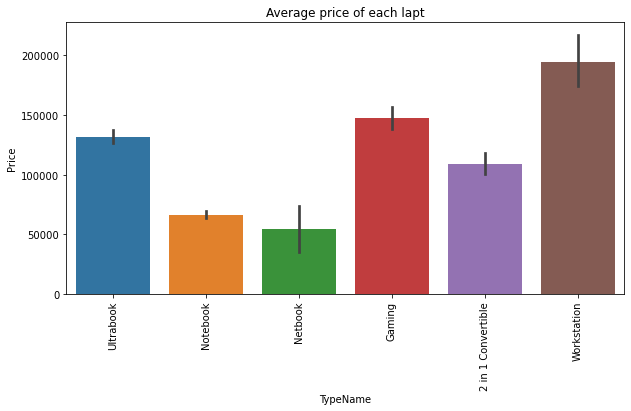

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(df["TypeName"], df["Price"])
plt.xticks(rotation=90)
plt.title("Average price of each lapt")
plt.show()

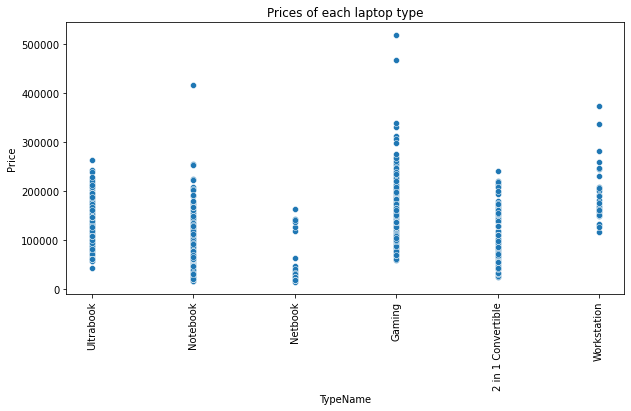

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["TypeName"], df["Price"])
plt.xticks(rotation=90)
plt.title("Prices of each laptop type") # We can see the variation of prices in each laptop category
plt.show()

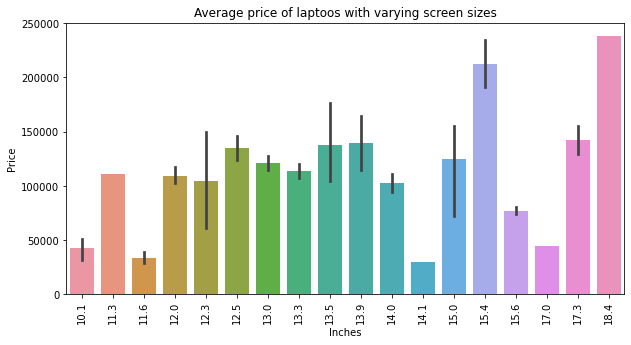

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(df["Inches"], df["Price"])
plt.xticks(rotation=90)
plt.title("Average price of laptoos with varying screen sizes")
plt.show()

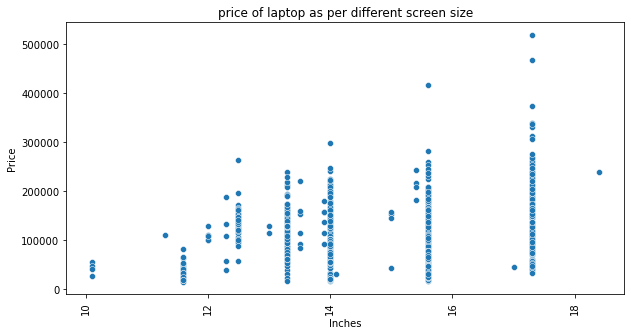

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Inches"], df["Price"])
plt.xticks(rotation=90)
plt.title("price of laptop as per different screen size") # Notice inthe increase of screen the price gets higer
plt.show()

Text(0.5, 1.0, 'As the ram increases the prices increases')

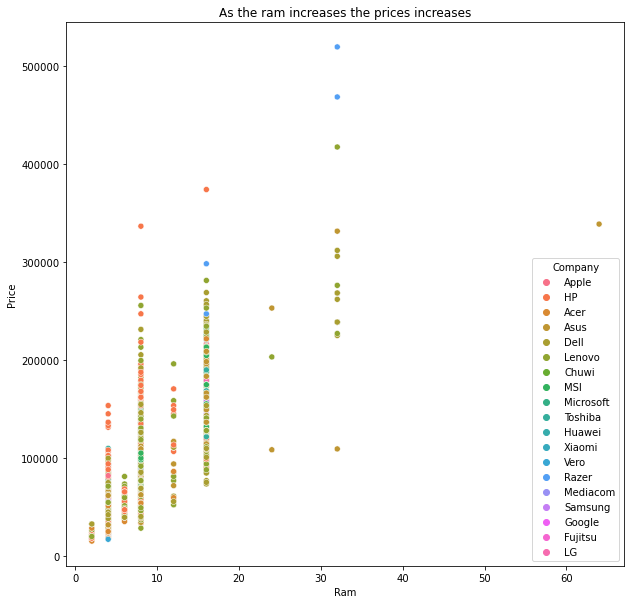

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(df["Ram"], df["Price"], hue=df["Company"])
plt.title("As the ram increases the prices increases")

Text(0.5, 1.0, 'Average Ram in different types of laptops')

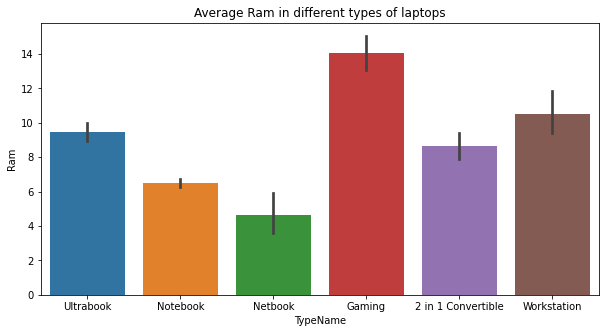

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(df["TypeName"], df["Ram"])
plt.title("Average Ram in different types of laptops")

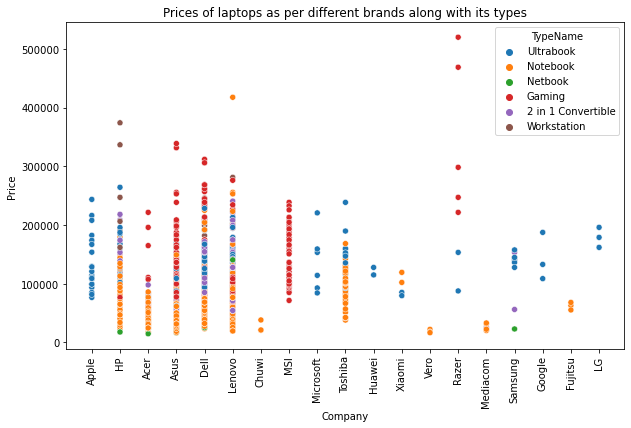

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["Company"], df["Price"], hue=df["TypeName"])
plt.xticks(rotation=90)
plt.title("Prices of laptops as per different brands along with its types")
plt.show()

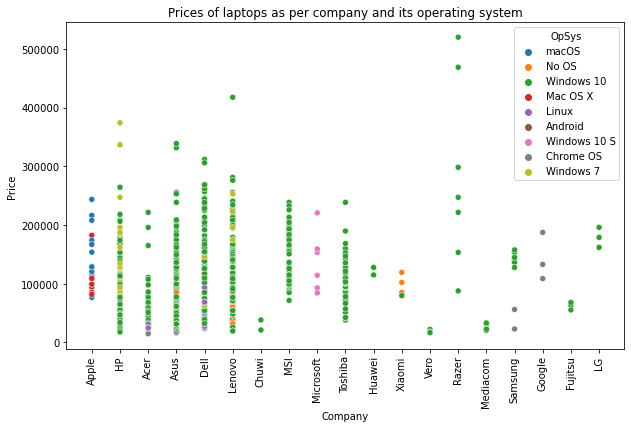

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["Company"], df["Price"], hue=df["OpSys"])
plt.xticks(rotation=90)
plt.title("Prices of laptops as per company and its operating system")
plt.show()

Text(0.5, 1.0, 'Plot showing how price vary on different operating systems')

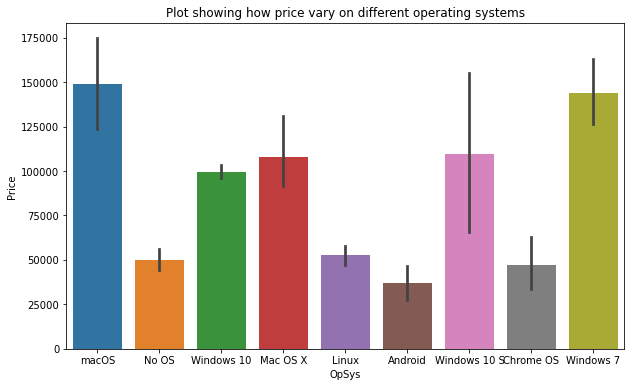

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(df["OpSys"], df["Price"])
plt.title("Plot showing how price vary on different operating systems")

Text(0.5, 1.0, 'Plot showing average price of different operating systems as per the RAM')

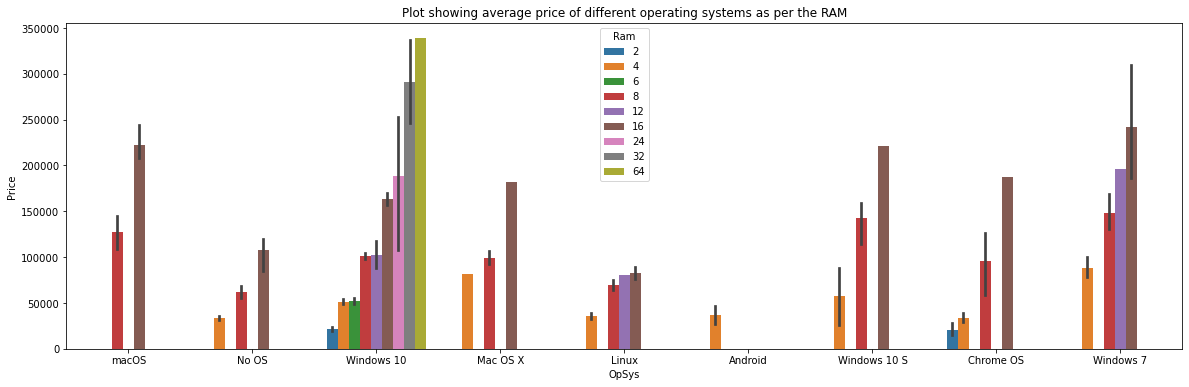

In [38]:
plt.figure(figsize=(20,6))
sns.barplot(df["OpSys"], df["Price"], hue=df["Ram"])
plt.title("Plot showing average price of different operating systems as per the RAM")

Text(0.5, 1.0, 'Plot showing average price of different laptop companies as per the RAM')

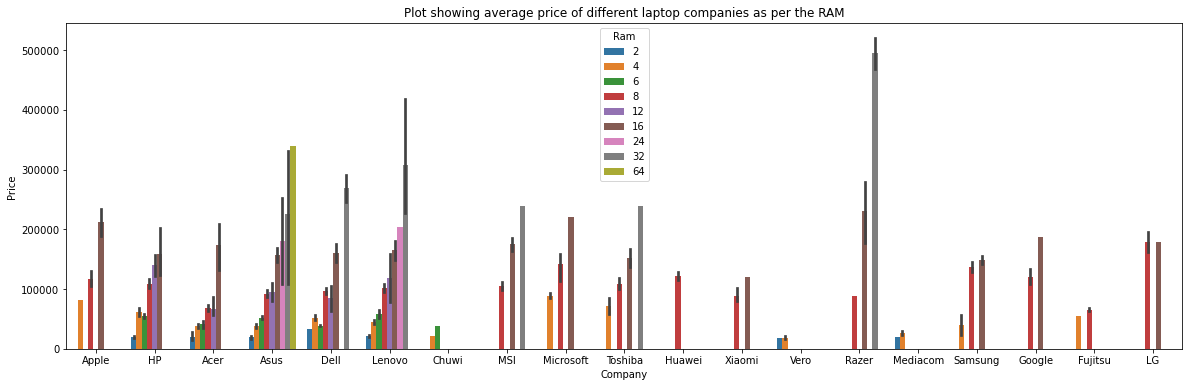

In [39]:
plt.figure(figsize=(20,6))
sns.barplot(df["Company"], df["Price"], hue=df["Ram"])
plt.title("Plot showing average price of different laptop companies as per the RAM")

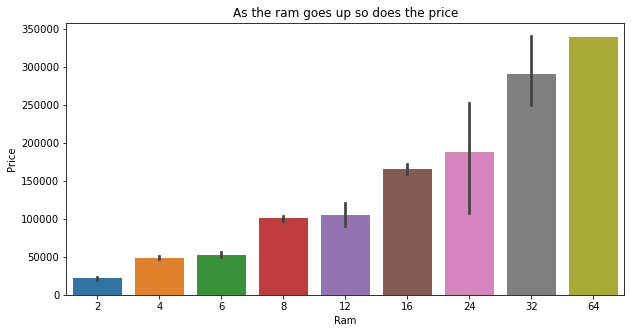

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Ram'],y=df['Price'])
plt.title("As the ram goes up so does the price")
plt.show()

<hr>
<hr>

# Feature Engineering

## THe ScreenResolution has difrrent features hidden within
Within that I am taking out whether the laptop is touch screen or not and dumping that in a new column

In [41]:
df["TouchScreen"] = df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [42]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
30,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89,20884,0
601,HP,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.10,56986,0
723,Dell,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,311956,0
265,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.67,68113,1
369,HP,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,149184,0
206,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,37423,1
1159,HP,2 in 1 Convertible,13.3,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.48,173991,1
917,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,136311,0
841,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,261957,0
407,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,512GB SSD,Intel HD Graphics,Windows 10,1.36,143216,0


In [43]:
df["TouchScreen"].value_counts() # so now there is a new colum that displays whether a laptop is touch screen or not

0    1111
1     192
Name: TouchScreen, dtype: int64

<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

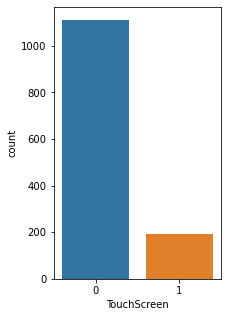

In [44]:
plt.figure(figsize=(3,5))
sns.countplot(df["TouchScreen"])

Text(0.5, 1.0, 'Average price of touchscreen laptops')

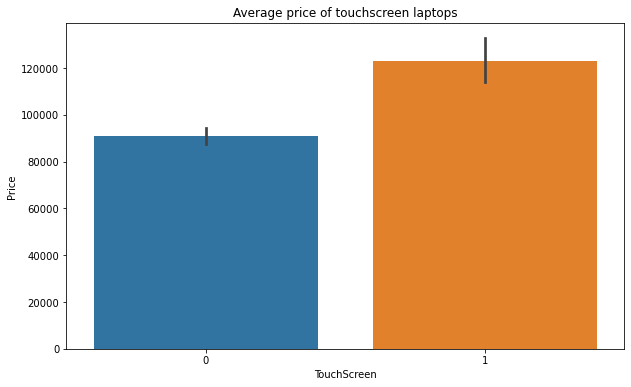

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(df["TouchScreen"], df["Price"])
plt.title("Average price of touchscreen laptops")

<hr>
<hr>

## Now I am taking out the hidden feature for a laptop with IPS display

In [46]:
df["Ips"] = df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0) 

In [47]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114205,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76632,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,49017,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216312,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153753,0,1


In [48]:
df["Ips"].value_counts() # so now there is a new colum that displays whether a laptop has IPS DIsplay or not

0    938
1    365
Name: Ips, dtype: int64

<AxesSubplot:xlabel='Ips', ylabel='count'>

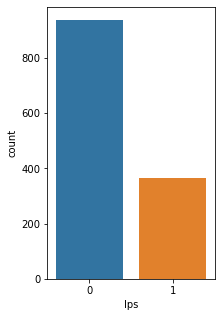

In [49]:
plt.figure(figsize=(3,5))
sns.countplot(df["Ips"])

Text(0.5, 1.0, 'Average price of IPS Display laptops')

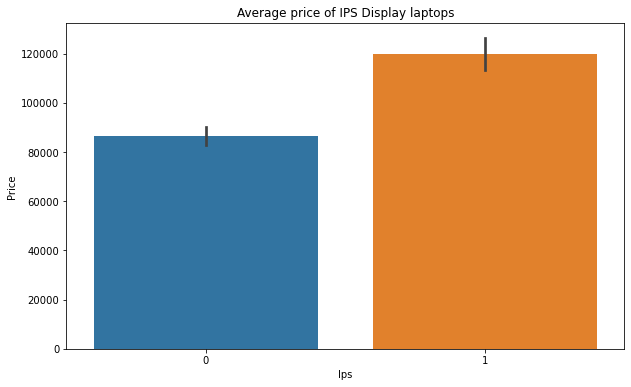

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(df["Ips"], df["Price"])
plt.title("Average price of IPS Display laptops")

<hr>
<hr> 

## Now I am taking out the hidden feature for a laptop with different resolutions

In [51]:
new = df["ScreenResolution"].str.split("x", n=1, expand = True)

In [52]:
df["X_resolution"] = new[0]
df["Y_resolution"] = new[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114205,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76632,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,49017,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216312,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153753,0,1,IPS Panel Retina Display 2560,1600


In [53]:
# Regular Expression
df["X_resolution"] = df["X_resolution"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]) # separating the data within the column so that I can separate
                                                                                                             # both the resolutions

In [54]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114205,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76632,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,49017,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216312,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153753,0,1,2560,1600


In [55]:
df.info() # the new formed resolution columns are object so need to change to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_resolution      1303 non-null   object 
 14  Y_resolution      1303 non-null   object 
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 142.6+ KB


In [56]:
df["X_resolution"] = df["X_resolution"].astype(int)
df["Y_resolution"] = df["Y_resolution"].astype(int)
df.info() # NOw both are intger types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int32  
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_resolution      1303 non-null   int32  
 14  Y_resolution      1303 non-null   int32  
dtypes: float64(2), int32(4), int64(2), object(7)
memory usage: 132.5+ KB


In [57]:
df.corr()["Price"] # co-relation with price
# you can see below that the co-relation of both x and y resolution with respect price is high that is the reason I sepreated those indivisualy in separate columns

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191227
Ips             0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Price, dtype: float64

In [58]:
# Calculating the PPI value
df["PPI"] = (((df["X_resolution"]**2) + (df["Y_resolution"]**2))**0.5/df["Inches"]).astype("float")

In [59]:
df.corr()["Price"] # You can see the corelation of price is high with the ppi value

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191227
Ips             0.252208
X_resolution    0.556529
Y_resolution    0.552809
PPI             0.473487
Name: Price, dtype: float64

## I have retrived everything I needed for my model training indivusaully so I wont be need ScreenResolution column

In [60]:
df = df.drop("ScreenResolution", axis=1)

In [61]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_resolution,Y_resolution,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114205,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76632,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,49017,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216312,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153753,0,1,2560,1600,226.983005


## Since I took out the ppi value which is the combinaiton of inches, x, y resolution the ppi column contains all the inforamtion about them so I wont be needing their indivisual column

In [62]:
df = df.drop(["Inches", "X_resolution", "Y_resolution"], axis=1)

In [63]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI
735,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.85,66408,0,0,141.211998
288,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,100507,0,1,141.211998
1234,Apple,Ultrabook,Intel Core i5 1.6GHz,4,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.08,81752,0,0,135.094211
715,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 920MX,Windows 10,1.87,73063,0,1,157.350512
1029,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,92067,0,0,127.335675


<hr>
<hr>

# Now Working in the CPU column to extract different hidden feature indivisually

In [64]:
df["Cpu"].value_counts() # There are many unique values among which I will extract some

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core i5 6260U 1.8GHz       1
Intel Core i5 7200U 2.70GHz      1
Intel Core i5 1.3GHz             1
Intel Core i5 7200U 2.50GHz      1
Intel Core M m3-7Y30 2.2GHz      1
Name: Cpu, Length: 118, dtype: int64

In [65]:
df["Cpu"].apply(lambda x:x.split()) #This code will split the values in the 'Cpu' column of the DataFrame 'df' based on 
                                    #whitespaces.

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [66]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3])) # Taking only first 3 elements from the 5 splitted values

In [67]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Name
1207,Lenovo,Notebook,AMD E-Series 9000 2.2GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.200,25489,0,0,100.454670,AMD E-Series 9000
952,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.200,124462,0,0,165.632118,Intel Core i5
497,HP,Notebook,Intel Core i7 7600U 2.8GHz,8,1TB SSD,Intel HD Graphics 620,Windows 10,1.480,149098,0,0,157.350512,Intel Core i7
1213,Dell,2 in 1 Convertible,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.191,85162,1,1,141.211998,Intel Core i5
122,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 940MX,No OS,2.200,53620,0,0,141.211998,Intel Core i5
484,Lenovo,Notebook,Intel Core i3 6006U 2.0GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.300,48165,0,0,100.454670,Intel Core i3
1151,HP,Notebook,AMD E-Series 7110 1.8GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,1.860,25318,0,0,100.454670,AMD E-Series 7110
1294,HP,Notebook,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.040,46885,0,0,141.211998,AMD A9-Series 9410
1282,HP,Netbook,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.170,17816,0,0,135.094211,Intel Celeron Dual
878,Dell,Notebook,Intel Core i5 7200U 2.5GHz,4,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.180,77788,0,0,141.211998,Intel Core i5


In [68]:
# Here I have made a function such that intel core i5,i3,i7 are displayed normally and the rest intel processors are dumped into
# other intel prcossor as well as for the amd processor
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [69]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [70]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Name,Cpu brand
899,Dell,Notebook,Intel Core i5 7300U 2.6GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,1.90,79706,0,0,141.211998,Intel Core i5,Intel Core i5
696,Lenovo,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.38,149098,1,0,157.350512,Intel Core i7,Intel Core i7
327,Asus,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.70,89501,0,0,141.211998,Intel Core i7,Intel Core i7
1144,HP,2 in 1 Convertible,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,153361,1,0,220.842824,Intel Core i7,Intel Core i7
865,HP,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.07,77575,0,0,141.211998,Intel Core i5,Intel Core i5
536,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,67977,0,0,141.211998,Intel Core i5,Intel Core i5
996,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.11,114999,1,1,165.632118,Intel Core i7,Intel Core i7
679,Acer,Gaming,Intel Core i5 7300HQ 2.5GHz,16,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,110737,0,0,141.211998,Intel Core i5,Intel Core i5
610,Lenovo,Notebook,Intel Xeon E3-1535M v6 3.1GHz,32,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.50,417629,0,1,282.423996,Intel Xeon E3-1535M,Other Intel Processor
480,Dell,Notebook,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.16,107582,0,1,141.211998,Intel Core i7,Intel Core i7


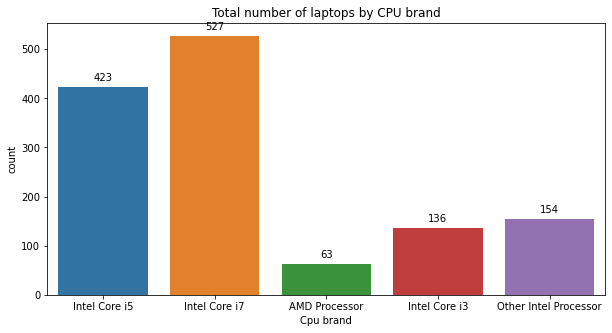

In [71]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["Cpu brand"])
plt.title("Total number of laptops by CPU brand")

# add count value on the top of each column
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


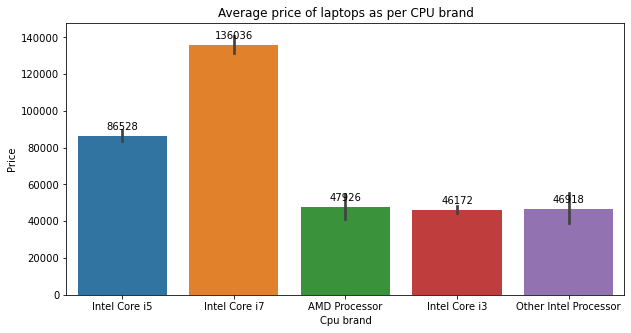

In [72]:
plt.figure(figsize=(10,5))
ax = sns.barplot(df["Cpu brand"], df["Price"])

# Add average price on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), 
                textcoords = 'offset points')
    
plt.title("Average price of laptops as per CPU brand")
plt.show()


Text(0.5, 1.0, 'Price of each Cpu brand alongside its laptop type')

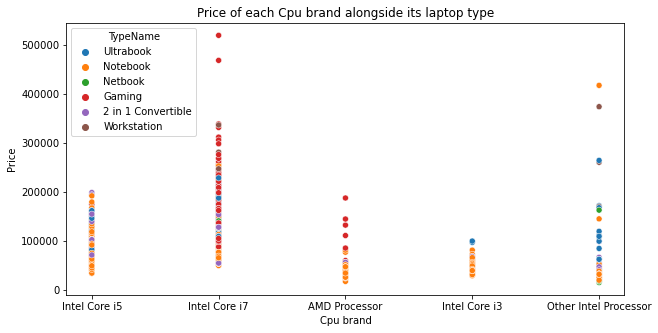

In [73]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Cpu brand"], df["Price"], hue=df["TypeName"])
plt.title("Price of each Cpu brand alongside its laptop type")

Text(0.5, 1.0, 'Price of each Cpu brand alongside its operating system')

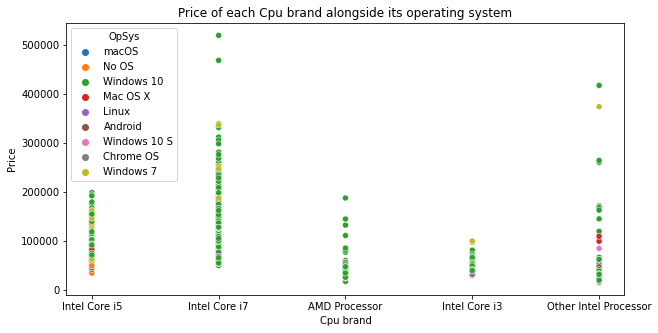

In [74]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Cpu brand"], df["Price"], hue=df["OpSys"])
plt.title("Price of each Cpu brand alongside its operating system")

## Now I have extracted necessary feature from Cpu column there dont need it

In [75]:
df = df.drop(["Cpu", "Cpu Name"], axis=1)

In [76]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,114205,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76632,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,49017,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,216312,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,153753,0,1,226.983005,Intel Core i5


# Now Working in the Memory column to extract different hidden feature indivisually

In [77]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [78]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
374,Dell,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.62,74081,1,0,165.632118,Intel Core i7,0,256,0,0
980,Dell,2 in 1 Convertible,12,512 SSD,Intel HD Graphics 620,Windows 10,2.19,110737,1,1,141.211998,Intel Core i7,0,512,0,0
636,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.23,159328,1,0,276.053530,Intel Core i5,0,256,0,0
36,Acer,Notebook,4,1000 HDD,Intel HD Graphics 620,Linux,2.10,31286,0,0,100.454670,Intel Core i3,1000,0,0,0
157,Asus,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.10,112101,1,0,165.632118,Intel Core i5,0,256,0,0


## I dont need th memory colum now

In [79]:
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,114205,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,76632,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,49017,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,216312,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,153753,0,1,226.983005,Intel Core i5,0,256,0,0


In [80]:
 df.corr()['Price'] # CHecking the co-realtion with price

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191227
Ips              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [81]:
# From above it is clear that HDD and Flash_storage has negative realtion which is why I dont need them
df = df.drop(["Hybrid", "Flash_Storage"], axis=1)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,114205,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,76632,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,49017,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,216312,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,153753,0,1,226.983005,Intel Core i5,0,256


# Now Working in the GPU column to extract different hidden feature indivisually

In [82]:
df["Gpu"].value_counts()

Intel HD Graphics 620       281
Intel HD Graphics 520       185
Intel UHD Graphics 620       68
Nvidia GeForce GTX 1050      66
Nvidia GeForce GTX 1060      48
                           ... 
AMD Radeon R7 M365X           1
AMD Radeon R7 M360            1
Nvidia GeForce GTX 1070M      1
AMD Radeon RX 560             1
Nvidia Quadro M500M           1
Name: Gpu, Length: 110, dtype: int64

In [83]:
df["Gpu brand"] = df["Gpu"].apply(lambda x:x.split()[0])

In [84]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,114205,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,76632,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,49017,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,216312,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,153753,0,1,226.983005,Intel Core i5,0,256,Intel


In [85]:
df = df[df['Gpu brand'] != 'ARM']

<AxesSubplot:xlabel='Gpu brand', ylabel='count'>

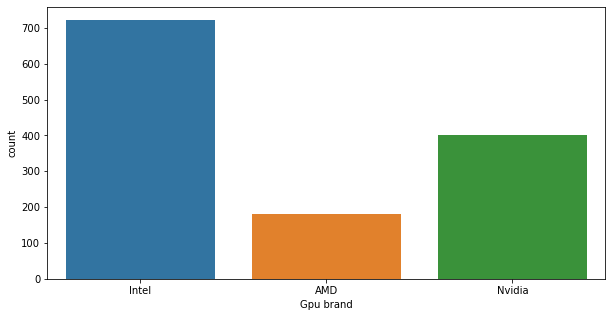

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(df["Gpu brand"])

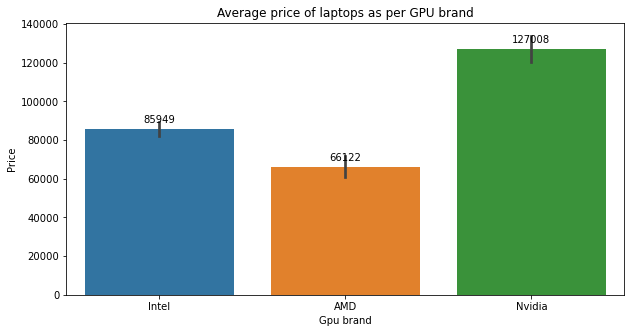

In [87]:
plt.figure(figsize=(10,5))
ax = sns.barplot(df["Gpu brand"], df["Price"])

# Add average price on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), 
                textcoords = 'offset points')
    
plt.title("Average price of laptops as per GPU brand")
plt.show()

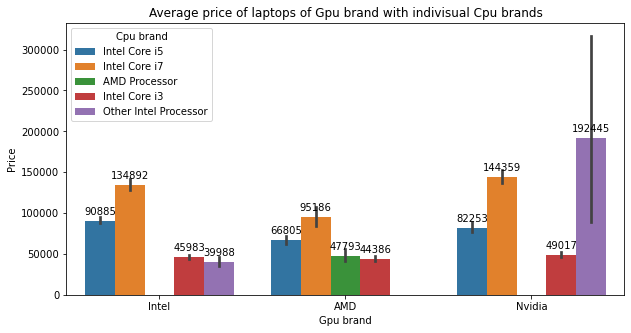

In [88]:
plt.figure(figsize=(10,5))
ax = sns.barplot(df["Gpu brand"], df["Price"], hue=df["Cpu brand"])

# Add average price on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), 
                textcoords = 'offset points')
    
plt.title("Average price of laptops of Gpu brand with indivisual Cpu brands")
plt.show()

## Since I extracted all necessary features form Gpu column I dont need it

In [89]:
df = df.drop("Gpu", axis=1)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,114205,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,76632,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,49017,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,216312,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,153753,0,1,226.983005,Intel Core i5,0,256,Intel


# Now Working in the OpSys column to extract different hidden feature indivisually

In [90]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

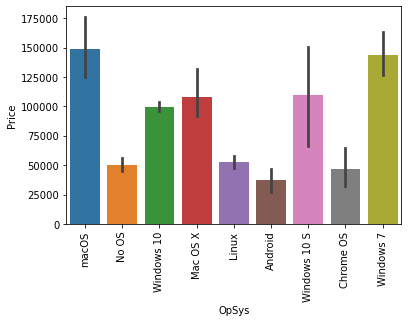

In [91]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [92]:
# Made similiar functon like above to distinguish betwen differend Operating system
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [93]:
df['os'] = df['OpSys'].apply(cat_os)

In [94]:

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,114205,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,76632,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,49017,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,216312,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,153753,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [95]:
df.drop(columns=['OpSys'],inplace=True)

<AxesSubplot:xlabel='os', ylabel='Price'>

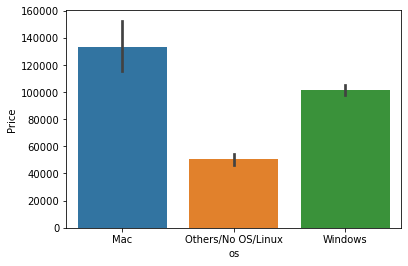

In [96]:
sns.barplot(x=df['os'],y=df['Price'])

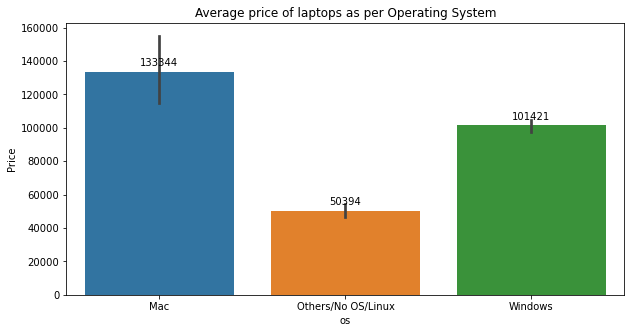

In [97]:
plt.figure(figsize=(10,5))
ax = sns.barplot(df["os"], df["Price"])

# Add average price on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 9), 
                textcoords = 'offset points')
    
plt.title("Average price of laptops as per Operating System")
plt.show()

<hr>
<hr>

<AxesSubplot:xlabel='Weight', ylabel='Density'>

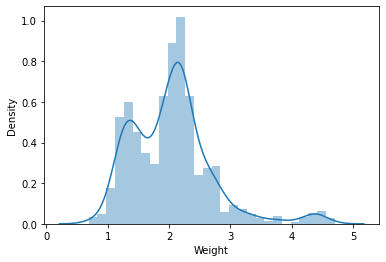

In [98]:
sns.distplot(df["Weight"])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

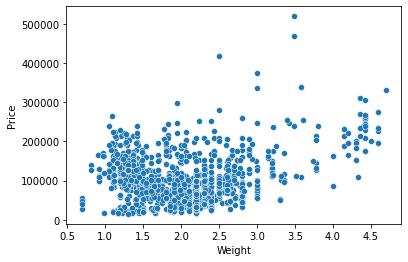

In [99]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

# Checking the realtion of each columns with eachother

<AxesSubplot:>

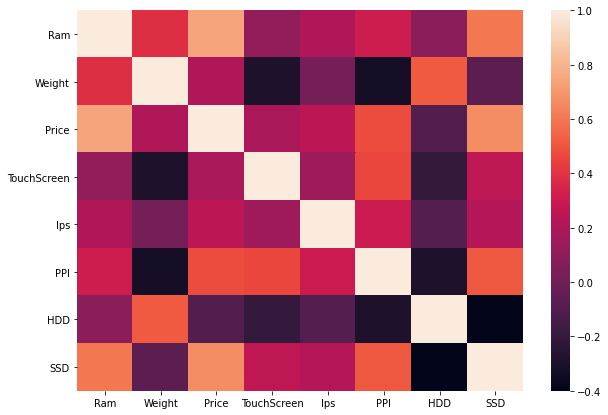

In [100]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())

# My target variable is a little skewed which will afeect my Ml model so converting that to normal

<AxesSubplot:xlabel='Price', ylabel='Density'>

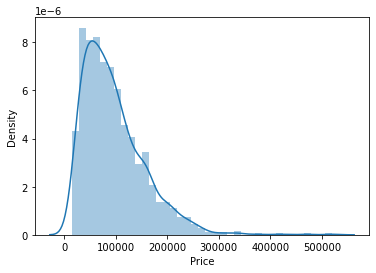

In [101]:
sns.distplot(df["Price"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

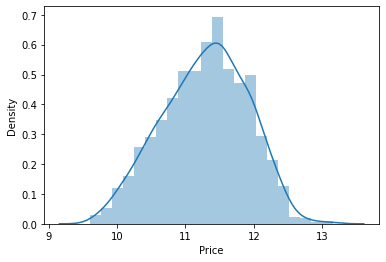

In [102]:
sns.distplot(np.log(df["Price"])) #Applying log transformation

<hr>
<hr>

In [103]:
X = df.drop("Price", axis=1)
y = np.log(df["Price"])

In [104]:
X

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [105]:
y

0       11.645750
1       11.246770
2       10.799922
3       12.284477
4       11.943103
          ...    
1298    10.903899
1299    11.758112
1300     9.879246
1301    11.084125
1302    10.356345
Name: Price, Length: 1302, dtype: float64

# Modelling

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [107]:
X_train

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [108]:
y_train

183     11.121378
1141    11.486797
1049    10.108141
1020    11.125143
878     11.261742
          ...    
466     10.596160
299     11.737220
493     10.806855
527     10.574594
1193    11.504319
Name: Price, Length: 1106, dtype: float64

In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [110]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Linear regression

In [111]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train) # first OHE is applied on X_train and thne passed to linear regression

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073275959770099
MAE 0.21018100128396347


# Ridge Regression

In [112]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127325391279991
MAE 0.20927090751756722


# Lasso Regression

In [113]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071850069284017
MAE 0.21114657728264055


# Decision Tree

In [114]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8391535757005658
MAE 0.18341883657959773


# SVM

In [115]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083749113308238
MAE 0.20240157132862654


# Random Forest

In [116]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
    
y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8871244313223812
MAE 0.15965057173039912


# ExtraTrees

In [117]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8758745985659654
MAE 0.1603638465008433


# AdaBoost

In [118]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8020591038112455
MAE 0.2278576521419064


# Gradient Boost

In [119]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8833527394791514
MAE 0.15923548965428486


# XgBoost

In [120]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8804387093911359
MAE 0.1628729584459747


# Voting Regressor(Combination of 4 algo mentinoned in step 2)

In [121]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8910305076239404
MAE 0.15687221822183603


# Stacking

In [122]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8806428154685798
MAE 0.16630076296365393


# Exporting the Model

In [123]:
import pickle

pickle.dump(df,open('df.pkl','wb')) # i need this to create dropdowns in the website
pickle.dump(pipe,open('pipe.pkl','wb')) # Using the random forest model as its the highest